#9 Numpy

# Exercise 9.5: Singular values
Generate an n × n matrix, denoted by C, where each entry is 1 with probability p and 0 otherwise. Use the linear algebra library of Scipy to compute the singular values of C. What can you say about the relationship between n, p and the largest singular value?


In [2]:
import numpy as np
from numpy import linalg 
from scipy.linalg import svdvals

In [3]:
n=200
p = 0.7
C = np.random.choice(2,(n,n),p=[p,1-p])
singular_matrix = svdvals(C)
print("Matrix size: {0} Probablity for 1: {1}".format(n, p))
print("Largest singular value: {0}".format(max(singular_matrix)))

Matrix size: 200 Probablity for 1: 0.7
Largest singular value: 60.57612316683286


The largest singular value is inversely proportional with probability and directly proportional with matrix size.

# 10 Scipy

##Exercise 10.1: Least squares
Generate matrix A ∈ Rm×n with m > n. Also generate some vector b ∈ Rm. Now find x = arg minx kAx − bk2. Print the norm of the residual.

In [4]:
from scipy.optimize import least_squares
m = 30
n = 20

A = np.random.random((m, n))
b = np.random.random(m)
c = np.random.random(n)

def argmin(x):
    return A.dot(x) - b

res = least_squares(argmin, c)

print(res.cost)


0.4343672681244797


##Exercise 10.2: Optimization
Find the maximum of the function f(x) = (sin(x − 2))^2e^(−x^2)

In [5]:
from scipy.optimize import fmin
from math import sin,exp

def fun(x):
    return sin(x-2)**2 * exp(-x**2)

max = fmin(lambda x:-fun(x), 0)
print(fun(max))

Optimization terminated successfully.
         Current function value: -0.911685
         Iterations: 20
         Function evaluations: 40
0.9116854117069156


##Exercise 10.3: Pairwise distances
Let X be a matrix with n rows and m columns. How can you compute the pairwise distances between every two rows? As an example application, consider n cities, and we are given their coordinates in two columns. Now we want a nice table that tells us for each two cities, how far they are apart. Again, make sure you make use of Scipy’s functionality instead of writing your own routine

In [6]:
from scipy.spatial import distance
n = 10 #city row
m = 2  #Coordinate columns

coordinates =  np.random.random((n, m))
print(coordinates)
print("\n")

nice_table= distance.cdist(coordinates, coordinates, 'euclidean')
print(nice_table)

[[0.5994668  0.74904582]
 [0.88061285 0.14722154]
 [0.52991439 0.34179277]
 [0.57345595 0.97652251]
 [0.63626837 0.80486464]
 [0.20552957 0.32001384]
 [0.50509652 0.46622951]
 [0.14515364 0.44849765]
 [0.41381923 0.63331911]
 [0.6351949  0.96210942]]


[[0.         0.66425565 0.41314959 0.22895897 0.06685877 0.58245599
  0.29814563 0.54472897 0.21876401 0.2160384 ]
 [0.66425565 0.         0.40105782 0.88435596 0.70156872 0.69684619
  0.49272569 0.79477516 0.67393407 0.85104185]
 [0.41314959 0.40105782 0.         0.63622143 0.47512811 0.32511511
  0.12688746 0.39928282 0.31379243 0.62918735]
 [0.22895897 0.88435596 0.63622143 0.         0.18278902 0.75257788
  0.5148514  0.679892   0.37851349 0.06339901]
 [0.06685877 0.70156872 0.47512811 0.18278902 0.         0.64854931
  0.36315259 0.60678754 0.28091189 0.15724844]
 [0.58245599 0.69684619 0.32511511 0.75257788 0.64854931 0.
  0.33334573 0.14196246 0.37622437 0.7725924 ]
 [0.29814563 0.49272569 0.12688746 0.5148514  0.36315259 0.333345

#11 Matplotlib


##Exercise 11.1: Plotting a function
Plot the function f(x) = (sin(x − 2))^2e^(−x^2) over the interval [0, 2]. Add proper axis labels, a title, etc.


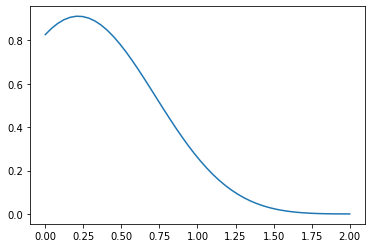

In [12]:
import math
import matplotlib.pyplot as plt

def fun(x):
  return (math.sin(x-2)**2)*np.exp(-x**2)

x=np.linspace(0,2)
y=[fun(i) for i in x]
plt.plot(x,y)
plt.show()

##Exercise 11.2: Data
Create a data matrix X with 20 observations of 10 variables. Generate a vector b with parameters Then
generate the response vector y = Xb+z where z is a vector with standard normally distributed variables.


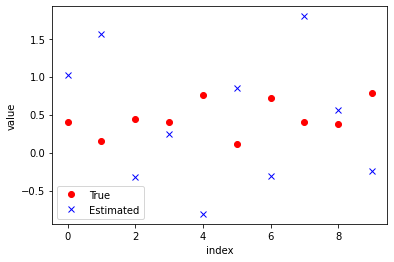

In [28]:
X=np.random.rand(20,10)
b=np.random.rand(10,1)
z=np.random.normal(size= 20).reshape(20,1)
y=np.dot(X,b)+z
estimated_b=np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

plt.plot(b,"ro",estimated_b,"bx")
plt.legend(["True","Estimated"],loc="lower left")
plt.xlabel("index")
plt.ylabel("value")
plt.show()

##Exercise 11.3: Histogram and density estimation
Generate a vector z of 10000 observations from your favorite exotic distribution. Then make a plot that
shows a histogram of z (with 25 bins), along with an estimate for the density, using a Gaussian kernel
density estimator (see scipy.stats). 

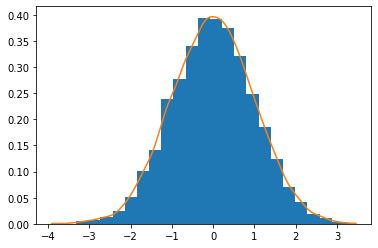

In [40]:
import scipy.stats 

z= sorted(np.random.randn(10000))
estimator=scipy.stats.gaussian_kde(z)
plt.hist(z,25,density=True)
plt.plot(z,estimator.pdf(z))
plt.show()